# HW-01：在 VScode 中运行 Stata 命令

- 姓名：宁确
- 学号：22361064
- 内容介绍：模拟生成两个变量并探索其数据特征、分布情况和相关性
- 说明：本人在完成作业过程中使用了Copilot、Kimi等AI工具，关键提示词参见[Kimi对话过程1](https://www.kimi.com/chat/d3fja9euvalujj58cbtg)、[Kimi对话过程2](https://www.kimi.com/chat/d3fl7rfsq93f83vc6r2g)、[Kimi对话过程3](https://www.kimi.com/chat/d3flmpnpma9ikv2lrk30)


In [1]:
// 生成模拟数据：N=500, x1 ~ N(0,1), x2 ~ N(3,1.5), Corr(x1,x2)=0.4
// 种子 = 学号后三位 = 064 -> 64

set seed 64
clear
set obs 500

// 参数
local mu2 = 3
local var2 = 1.5        
local sd2 = sqrt(`var2')
local rho = 0.4
local k = sqrt(1 - (`rho')^2)

generate x1 = rnormal(0,1)
generate e  = rnormal(0,1)
generate x2 = `mu2' + `sd2'*(`rho'*x1 + `k'*e)
drop e

save "simu_01.dta", replace


  ___  ____  ____  ____  ____ ©
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       MP—Parallel Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Single-user 4-core  perpetual
Serial number: 501706332621
  Licensed to: AndyNingQue
               SYSU

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. More than 2 billion observations are allowed; see help obs_advice.
      3. Maximum number of variables is set to 5,000; see help set_maxvar.


Number of observations (_N) was 0, now 500.
file simu_01.dta saved


## 呈现数据的前 5 行

In [2]:
// 显示数据的前 5 行
list in 1/5


     +----------------------+
     |        x1         x2 |
     |----------------------|
  1. |   .997025   .9773682 |
  2. |  -1.53158   1.078502 |
  3. | -.7824845    3.38148 |
  4. |  1.653226   4.044888 |
  5. | -.7950736   5.295868 |
     +----------------------+


- 前5行能大致体现数据的分布情况

## 呈现数据的描述性统计

In [3]:
// 数据的描述性统计，包括均值，标准差，中位数，最大值，最小值，偏度，峰度
summarize x1 x2, detail


                             x1
-------------------------------------------------------------
      Percentiles      Smallest
 1%    -2.187509      -3.030987
 5%    -1.620051      -2.520322
10%    -1.332988      -2.371014       Obs                 500
25%    -.6902385      -2.249085       Sum of wgt.         500

50%     .0161744                      Mean            .002054
                        Largest       Std. dev.      .9942699
75%     .7480481       2.421548
90%     1.231853       2.438601       Variance       .9885727
95%     1.579437       2.572354       Skewness       .0124763
99%      2.34406       3.044499       Kurtosis       2.722826

                             x2
-------------------------------------------------------------
      Percentiles      Smallest
 1%     .0497932      -.4021876
 5%     .8098501      -.4012772
10%     1.224621      -.2358921       Obs                 500
25%     2.000699      -.0173254       Sum of wgt.         500

50%     2.990827          

- 描述性统计具体呈现了数据的分布情况，符合预期

## 呈现 x1 的直方图

(bin=22, start=-3.0309865, width=.27615842)


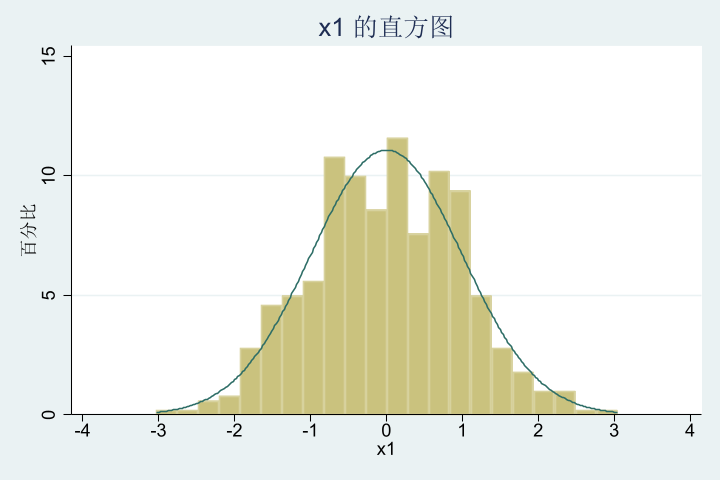

In [ ]:
// 绘制 x1 的直方图并叠加正态密度曲线
histogram x1, percent normal ///
    title("x1 的直方图") ///
    xtitle("x1") ytitle("-----asnasdjanddsaahiuhuh百分比") xlabel(-4(1)4)

- 从直方图看，x1符合标准正态分布

##  呈现 x1 和 x2 的密度函数图

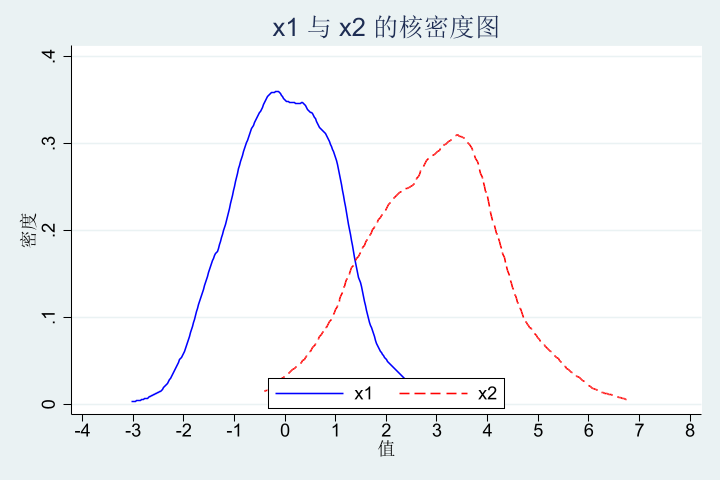

In [5]:
// 绘制 x1 和 x2 的核密度估计并叠加在同一张图上
// x1 用蓝线，x2 用红线
twoway (kdensity x1, lcolor(blue) lwidth(medium) lpattern(solid)) ///
       (kdensity x2, lcolor(red)  lwidth(medium) lpattern(dash)), ///
       title("x1 与 x2 的核密度图") ///
       xtitle("值") ytitle("密度") ///
       legend(order(1 "x1" 2 "x2") ring(0) pos(6)) ///
       xlabel(-4(1)8)

- 从核密度图看，x1和x2与预期分布基本吻合

## 呈现 x1 和 x2 的箱线图

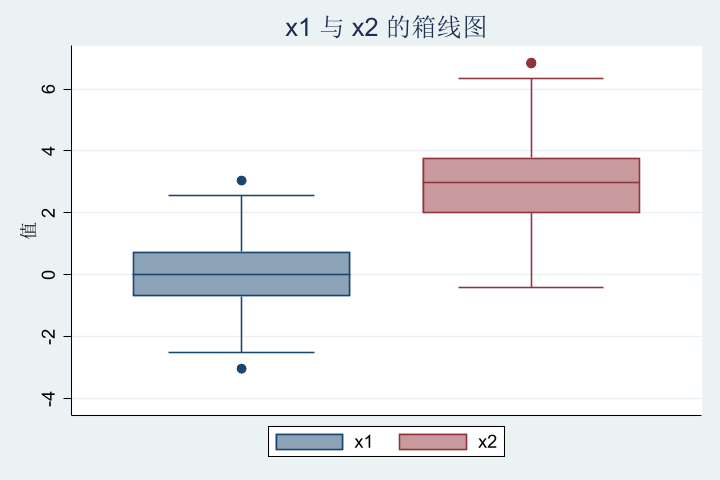

In [6]:
// 绘制 x1 和 x2 的并列箱线图
graph box x1 x2, ///
    title("x1 与 x2 的箱线图") ///
    ytitle("值") ///
    name(box_x1x2, replace)

- 从箱线图看，x1和x2各存在2个和1个离群点，分位数与预期基本符合

## 呈现 x1 和 x2 的小提琴图

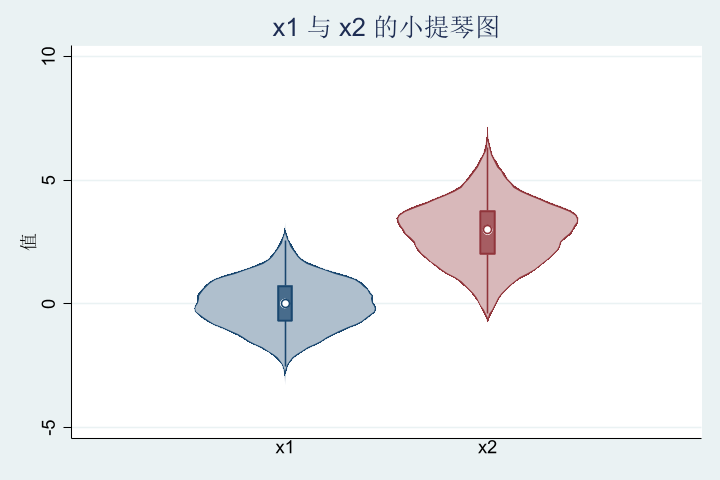

In [7]:
// 绘制 x1 和 x2 的小提琴图
vioplot x1 x2, legend( ring(0) pos(2) cols(1)) ///
    title("x1 与 x2 的小提琴图") ///
    ytitle("值") ///
    scheme(s2color)

- 从小提琴图看，x1和x2的分布情况和数据特征符合预期

## 计算 x1 和 x2 的相关系数

In [8]:
// 计算 x1 和 x2 的皮尔逊相关系数
correlate x1 x2

(obs=500)

             |       x1       x2
-------------+------------------
          x1 |   1.0000
          x2 |   0.4271   1.0000



- x1与x2的相关系数为0.4271，接近预设的0.4，说明数据生成符合预期

## 绘制 x1 和 x2 的散点图


      Source |       SS           df       MS      Number of obs   =       500
-------------+----------------------------------   F(1, 498)       =    111.09
       Model |  151.344218         1  151.344218   Prob > F        =    0.0000
    Residual |  678.423642       498  1.36229647   R-squared       =    0.1824
-------------+----------------------------------   Adj R-squared   =    0.1808
       Total |   829.76786       499  1.66286144   Root MSE        =    1.1672

------------------------------------------------------------------------------
          x2 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
          x1 |   .5538962    .052551    10.54   0.000     .4506471    .6571452
       _cons |   2.920377   .0521977    55.95   0.000     2.817822    3.022932
------------------------------------------------------------------------------


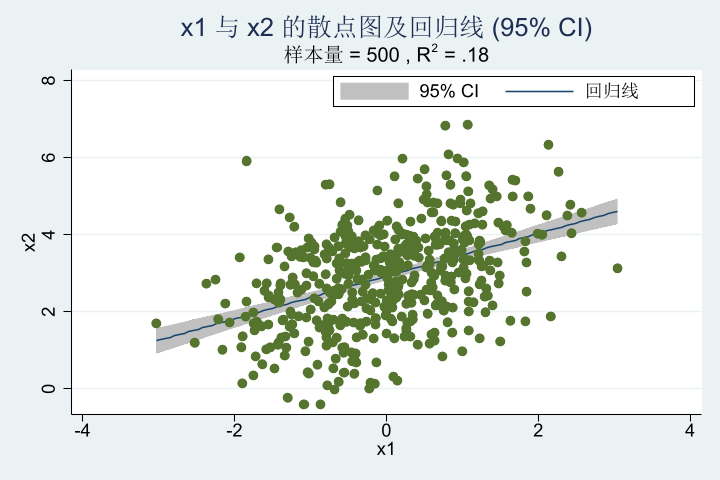

In [9]:
// 绘制 x1 和 x2 的散点图，并叠加线性回归线和95%置信区间
// 拟合回归
regress x2 x1
local r2 = round(`e(r2)', 0.01)

// 绘图
twoway (lfitci x2 x1) (scatter x2 x1), ///
       ytitle("x2") xtitle("x1") ///
       title("x1 与 x2 的散点图及回归线 (95% CI)") ///
       subtitle("样本量 = `=_N' , R{superscript:2} = `r2'") ///
       legend(order(1 "95% CI" 2 "回归线") ring(0) pos(1)) ///
       name(scatter_reg, replace)

- x1与x2呈正相关，x1每增加1个单位，x2增加0.55个单位